# Logistic Regression on MNIST 

## Assignment 3 (Deadline : 29/10/2020 11:59PM)

Total Points : 100

In [1]:
import numpy as np
np.random.seed(42)  # setting random seed for reproducibility

### 1. Digit Classification : 8 vs others (40 points)

In [2]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# The digits data can be loaded as follows :
from sklearn import datasets
D = datasets.load_digits()
X, y = D["data"], D["target"]

In [4]:
# check the shape of the data
print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (1797, 64)
Shape of y: (1797,)


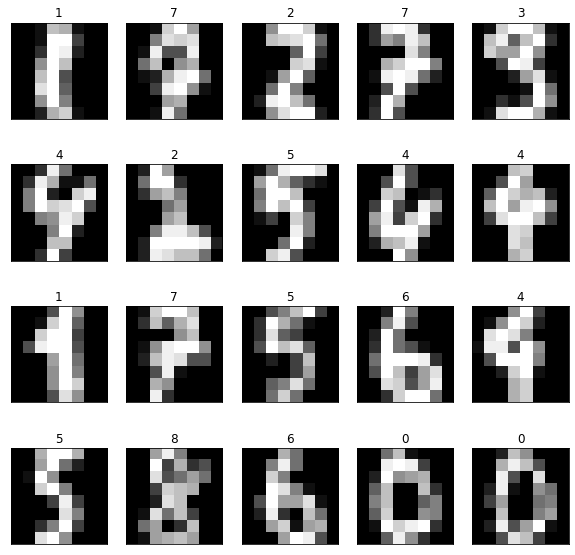

In [5]:
# Plot a few digits to get a sense of how the data looks like
fig, axes = plt.subplots(4, 5, figsize = (10, 10))
for ax in axes.flatten():
    index = np.random.randint(0, X.shape[0])
    ax.imshow(X[index].reshape(8, 8), cmap = 'gray')
    ax.set_title(y[index])
    ax.set_xticks([])
    ax.set_yticks([])

### Let's plot the number of examples in each class

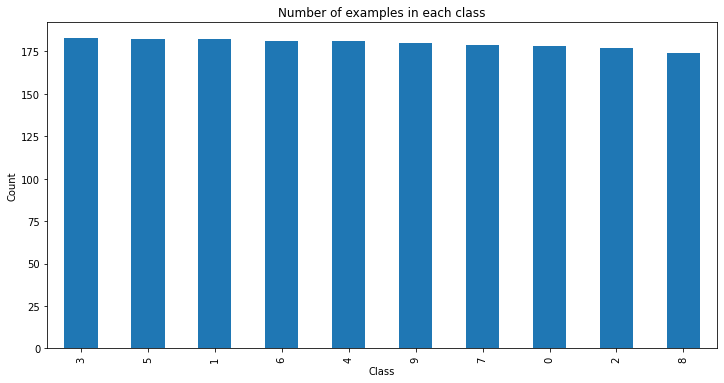

In [6]:
pd.Series(y).value_counts().plot(kind = 'bar', title = 'Number of examples in each class', 
                                 xlabel = 'Class', ylabel = 'Count', figsize = (12, 6));

In [7]:
pd.Series(y).value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

- The classes are well balanced as can be seen from the above graph

In [8]:
# Redefine the labels
y[y != 8] = 0
y[y == 8] = 1

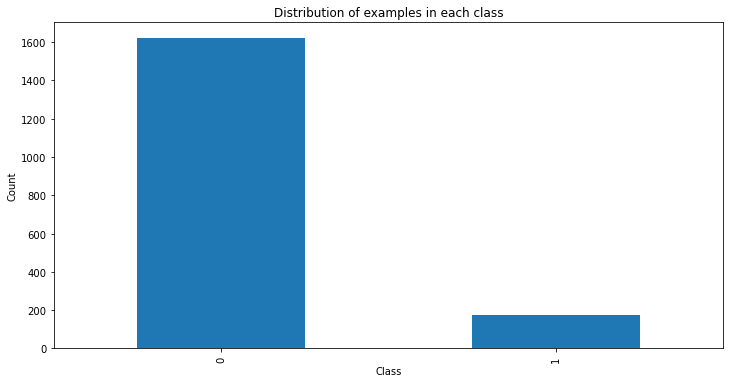

In [9]:
pd.Series(y).value_counts().plot(kind = 'bar', title = 'Distribution of examples in each class', 
                                 xlabel = 'Class', ylabel = 'Count', figsize = (12, 6));

In [10]:
pd.Series(y).value_counts()

0    1623
1     174
dtype: int64

- As can be seen from the above graph, the distribution is highly imbalanced

### Plot the number of examples in both classes

In [11]:
# Create a 2-class classification problem (digit 8 versus other digits)
# 20% for testing and rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print(f"Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (1437, 64)
Shape of y_train: (1437,)
Shape of X_test: (360, 64)
Shape of y_test: (360,)


### Logistic Regression Model with no penalty

In [12]:
# Train a logistic regression model with no regularisation for the problem and obtain the cross validation accuracies
solvers = ['sag', 'saga', 'lbfgs', 'newton-cg']

for solver in solvers:
    LR = LogisticRegression(penalty = 'none', solver = solver, max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy: {round(score.mean(), 4)} with {solver} solver")

Mean accuracy: 0.9548 with sag solver
Mean accuracy: 0.9548 with saga solver
Mean accuracy: 0.9569 with lbfgs solver
Mean accuracy: 0.9569 with newton-cg solver


- **LBFGS and newton-cg** solver gave the best performance

In [13]:
# Predict values for the test set using the model obtained above 
LR = LogisticRegression(penalty = 'none', solver = 'lbfgs', max_iter = 10000, random_state = 0)
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(X_test)

In [14]:
# Obtain all the different performance metrics for the model on the test set
confusion_matrix(y_test, np.argmax(y_pred, axis = -1))

array([[322,   3],
       [ 10,  25]], dtype=int64)

In [15]:
# print the accuracy score
round(accuracy_score(y_test, np.argmax(y_pred, axis = -1)), 4)

0.9639

### Logistic Regression with L2 regularization

In [16]:
# Change the hyperparameters of the model and see what effect it has on the model
# Find the hyperparameters which maximises the model performance. Choose the right performance metric to evaluate the model
lambda_param = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]

for C in lambda_param:
    LR = LogisticRegression(penalty = 'l2', C = C, solver = 'lbfgs', max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with l2 penalty: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with l2 penalty: 0.961 when C = 0.001
Mean accuracy using cross validation with l2 penalty: 0.9659 when C = 0.003
Mean accuracy using cross validation with l2 penalty: 0.9631 when C = 0.01
Mean accuracy using cross validation with l2 penalty: 0.9645 when C = 0.03
Mean accuracy using cross validation with l2 penalty: 0.9617 when C = 0.1
Mean accuracy using cross validation with l2 penalty: 0.9624 when C = 0.3
Mean accuracy using cross validation with l2 penalty: 0.9603 when C = 1
Mean accuracy using cross validation with l2 penalty: 0.9603 when C = 3
Mean accuracy using cross validation with l2 penalty: 0.9582 when C = 10
Mean accuracy using cross validation with l2 penalty: 0.9575 when C = 30
Mean accuracy using cross validation with l2 penalty: 0.9582 when C = 100
Mean accuracy using cross validation with l2 penalty: 0.9575 when C = 300


### Logistic Regression with L1 regularization using saga solver 
- **LBFGS solver** doesn't support l1 regularization

In [17]:
for C in lambda_param:
    LR = LogisticRegression(penalty = 'l1', C = C, solver = 'saga', max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with l1 penalty: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with l1 penalty: 0.9033 when C = 0.001
Mean accuracy using cross validation with l1 penalty: 0.9033 when C = 0.003
Mean accuracy using cross validation with l1 penalty: 0.9471 when C = 0.01
Mean accuracy using cross validation with l1 penalty: 0.9596 when C = 0.03
Mean accuracy using cross validation with l1 penalty: 0.9589 when C = 0.1
Mean accuracy using cross validation with l1 penalty: 0.9548 when C = 0.3
Mean accuracy using cross validation with l1 penalty: 0.9534 when C = 1
Mean accuracy using cross validation with l1 penalty: 0.9548 when C = 3
Mean accuracy using cross validation with l1 penalty: 0.9548 when C = 10
Mean accuracy using cross validation with l1 penalty: 0.9555 when C = 30
Mean accuracy using cross validation with l1 penalty: 0.9555 when C = 100
Mean accuracy using cross validation with l1 penalty: 0.9548 when C = 300


### Logistic Regression with elasticnet regularization and saga solver 
- LBFGS solver doesn't support l1 regularization

In [18]:
for C in lambda_param:
    LR = LogisticRegression(penalty = 'elasticnet', C = C, solver = 'saga', max_iter = 10000, random_state = 0, l1_ratio = 0.5)
    score = cross_val_score(LR, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with elasticnet penalty: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with elasticnet penalty: 0.9033 when C = 0.001
Mean accuracy using cross validation with elasticnet penalty: 0.9165 when C = 0.003
Mean accuracy using cross validation with elasticnet penalty: 0.9589 when C = 0.01
Mean accuracy using cross validation with elasticnet penalty: 0.9589 when C = 0.03
Mean accuracy using cross validation with elasticnet penalty: 0.9582 when C = 0.1
Mean accuracy using cross validation with elasticnet penalty: 0.9534 when C = 0.3
Mean accuracy using cross validation with elasticnet penalty: 0.9548 when C = 1
Mean accuracy using cross validation with elasticnet penalty: 0.9541 when C = 3
Mean accuracy using cross validation with elasticnet penalty: 0.9548 when C = 10
Mean accuracy using cross validation with elasticnet penalty: 0.9555 when C = 30
Mean accuracy using cross validation with elasticnet penalty: 0.9548 when C = 100
Mean accuracy using cross validation with elasticnet penalty: 0.9548 when C = 300


### Best model parameters:
- Solver: LBFGS
- C = 0.003
- Penalty = l2

In [19]:
# model with best parameters
LR = LogisticRegression(penalty = 'l2', C = 0.003, solver = 'lbfgs', max_iter = 10000, random_state = 0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [21]:
# plot the confusion matrix
confusion_matrix(y_test, y_pred)

array([[325,   0],
       [ 13,  22]], dtype=int64)

In [25]:
# print the accuracy score
round(accuracy_score(y_test, y_pred), 4)

0.9639

### Preprocess the input data

In [26]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [27]:
for C in lambda_param:
    LR = LogisticRegression(penalty = 'l2', C = C, solver = 'lbfgs', max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with l2 penalty: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with l2 penalty: 0.9033 when C = 0.001
Mean accuracy using cross validation with l2 penalty: 0.9033 when C = 0.003
Mean accuracy using cross validation with l2 penalty: 0.9381 when C = 0.01
Mean accuracy using cross validation with l2 penalty: 0.961 when C = 0.03
Mean accuracy using cross validation with l2 penalty: 0.9638 when C = 0.1
Mean accuracy using cross validation with l2 penalty: 0.9638 when C = 0.3
Mean accuracy using cross validation with l2 penalty: 0.961 when C = 1
Mean accuracy using cross validation with l2 penalty: 0.9596 when C = 3
Mean accuracy using cross validation with l2 penalty: 0.9589 when C = 10
Mean accuracy using cross validation with l2 penalty: 0.9575 when C = 30
Mean accuracy using cross validation with l2 penalty: 0.9562 when C = 100
Mean accuracy using cross validation with l2 penalty: 0.9562 when C = 300


In [28]:
# model with best parameters
LR = LogisticRegression(penalty = 'l2', C = 0.3, solver = 'lbfgs', max_iter = 10000, random_state = 0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [29]:
# plot the confusion matrix
confusion_matrix(y_test, y_pred)

array([[322,   3],
       [ 10,  25]], dtype=int64)

In [30]:
# print the accuracy score
round(accuracy_score(y_test, y_pred), 4)

0.9639

### 2. California Housing Prices (60 points)

In this problem, we will take the same California Housing prices dataset that was shown in the last lab class to do a binary classification of whether the median house value for a given locality is high or low .

In [ ]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok = True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [29]:
# Read the data into a dataframe
housing_df = pd.read_csv('datasets/housing/housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
# Shape of the dataframe
housing_df.shape

(20640, 10)

In [31]:
# Basic info about the dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
# Description of the dataset
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### Explore the data to understand it better

In [33]:
# Check the null values in the dataset
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- **Total bedrooms column has 207 null values**.

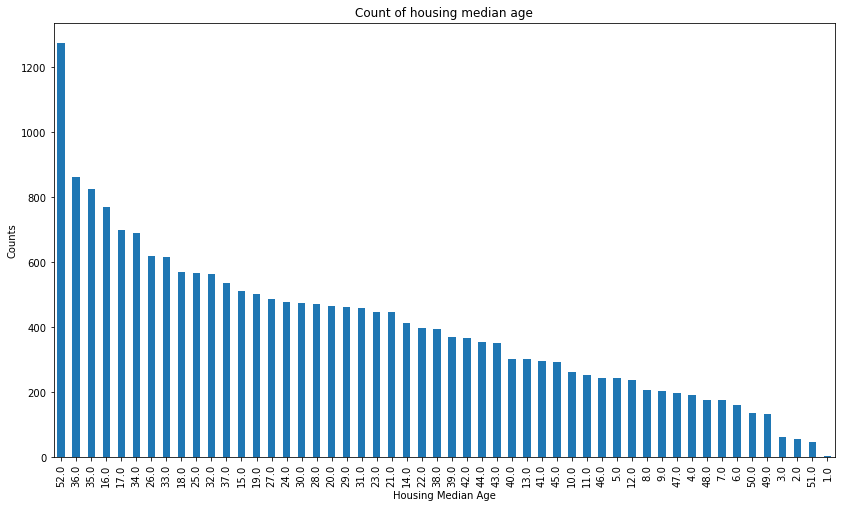

In [36]:
# plot the counts of housing median age
housing_df.housing_median_age.value_counts().plot(kind = 'bar', title = 'Count of housing median age', ylabel = 'Counts',
                                                   xlabel = 'Housing Median Age', figsize = (14, 8));

- **Housing median age = 52** occurs maximum number of times. It may be a typo because all other values are much less in frequency.

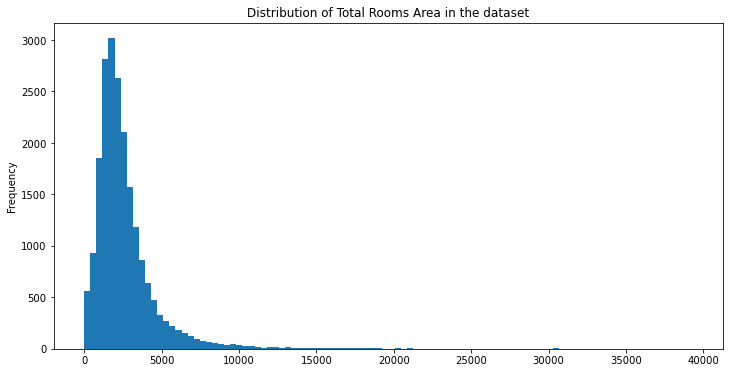

In [43]:
# Plot the distribution of total_rooms area
housing_df.total_rooms.plot(kind = 'hist', bins = 100, title = 'Distribution of Total Rooms Area in the dataset', 
                            figsize = (12, 6));

In [44]:
# largest 15 values in the total rooms column in the dataset
housing_df.total_rooms.sort_values(ascending = True).iloc[-15:]

12374    24121.0
15360    25135.0
20451    25187.0
9145     25957.0
12152    26322.0
6066     27700.0
12623    27870.0
922      28258.0
12215    30401.0
9019     30405.0
12201    30450.0
6057     32054.0
9880     32627.0
10309    37937.0
13139    39320.0
Name: total_rooms, dtype: float64

- There are few houses with **very large values of total rooms area**. These are probably outliers in this column. 
- Most values in the above distribution lies in the **range from 0 - 10000**.

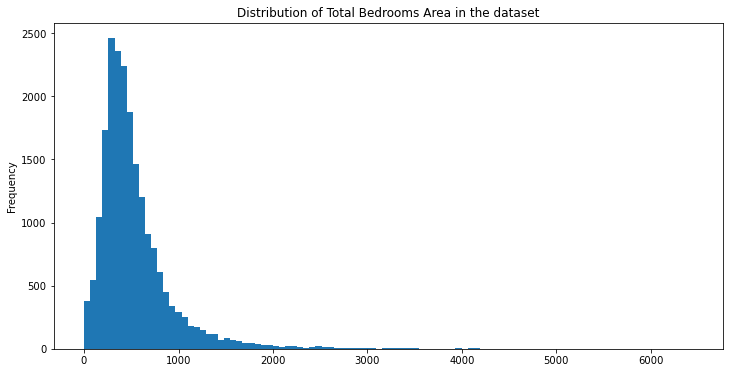

In [45]:
# Plot the distribution of total_bedrooms area
housing_df.total_bedrooms.plot(kind = 'hist', bins = 100, title = 'Distribution of Total Bedrooms Area in the dataset', 
                            figsize = (12, 6));

In [46]:
# largest 15 values in the total bedrooms column in the dataset
housing_df.total_bedrooms.dropna().sort_values(ascending = True).iloc[-15:]

4035     4457.0
9744     4492.0
12374    4522.0
14505    4585.0
9145     4798.0
15360    4819.0
12106    4952.0
12215    4957.0
12623    5027.0
12201    5033.0
6057     5290.0
8985     5419.0
10309    5471.0
13139    6210.0
9880     6445.0
Name: total_bedrooms, dtype: float64

- There are few **very large values in the total bedrooms column**. These are probably outliers in this column.
- The distribution lies mostly in the **range 0 - 2000**.

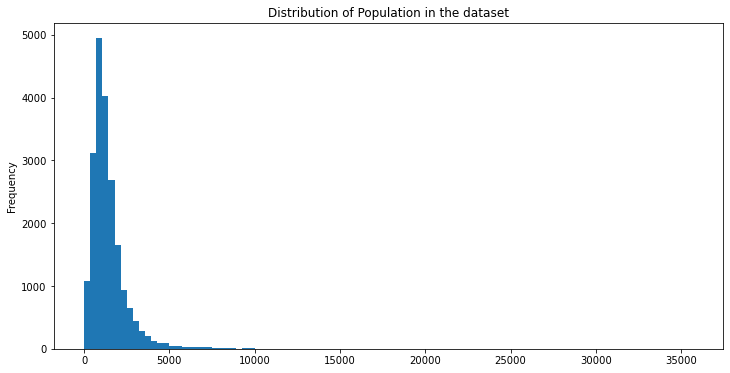

In [47]:
# Plot the distribution of population column
housing_df.population.plot(kind = 'hist', bins = 100, title = 'Distribution of Population in the dataset', 
                            figsize = (12, 6));

In [48]:
# largest 15 values in the population column in the dataset
housing_df.population.sort_values(ascending = True).iloc[-15:]

9697     11272.0
12623    11935.0
20451    11956.0
9122     11973.0
9744     12153.0
922      12203.0
17413    12427.0
9019     12873.0
12215    13251.0
6066     15037.0
6057     15507.0
10309    16122.0
13139    16305.0
9880     28566.0
15360    35682.0
Name: population, dtype: float64

- Few values in the population column are very large as can be seen from the above plot and value counts.
- The distribution lies mostly in the **range 0 - 5000**.

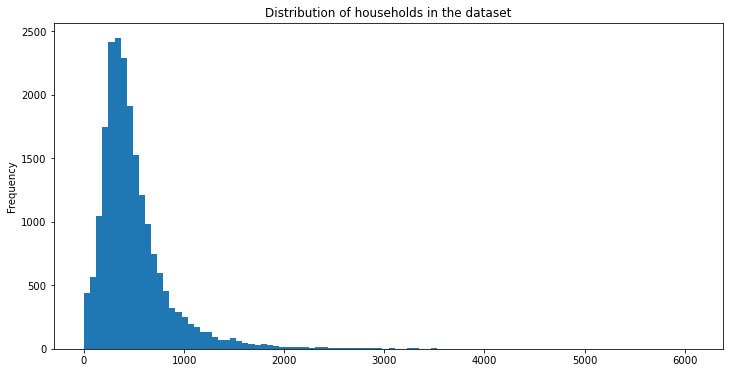

In [49]:
# Plot the distribution of households column in the dataset
housing_df.households.plot(kind = 'hist', bins = 100, title = 'Distribution of households in the dataset', 
                            figsize = (12, 6));

In [50]:
# largest 15 values in the households column in the dataset
housing_df.households.sort_values(ascending = True).iloc[-15:]

9018     4012.0
6066     4072.0
14505    4176.0
4035     4204.0
12215    4339.0
9744     4372.0
9145     4490.0
12106    4616.0
15360    4769.0
12623    4855.0
8985     4930.0
6057     5050.0
10309    5189.0
13139    5358.0
9880     6082.0
Name: households, dtype: float64

- Few values in the household column are very large as can be seen from the above plot and value counts.
- The distribution lies mostly in the **range 0 - 2000**.

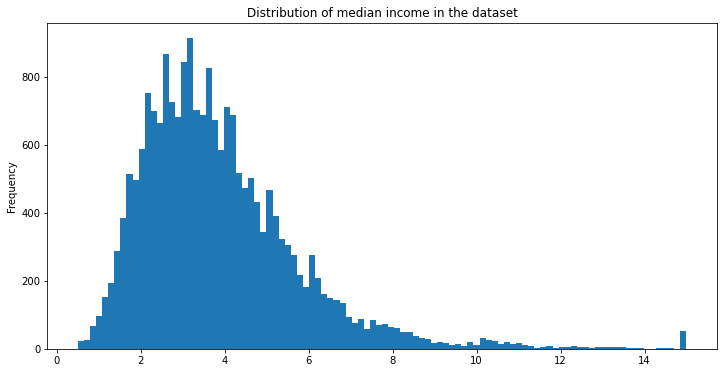

In [51]:
# Plot the distribution of median income column in the dataset
housing_df.median_income.plot(kind = 'hist', bins = 100, title = 'Distribution of median income in the dataset', 
                            figsize = (12, 6));

In [55]:
# largest 15 values in the median income column in the dataset
housing_df.median_income.sort_values(ascending = True).iloc[-15:]

6590     15.0001
4352     15.0001
10760    15.0001
8851     15.0001
6399     15.0001
6391     15.0001
4604     15.0001
17170    15.0001
11520    15.0001
8854     15.0001
4605     15.0001
4606     15.0001
4626     15.0001
8848     15.0001
17166    15.0001
Name: median_income, dtype: float64

In [56]:
# Count of median income with value equal to 15.001
(housing_df.median_income == 15.0001).sum()

49

- There are **49 entries with median income value = 15.0001**. This can be a typo or outlier in this column.
- This is also the largest value in this column.

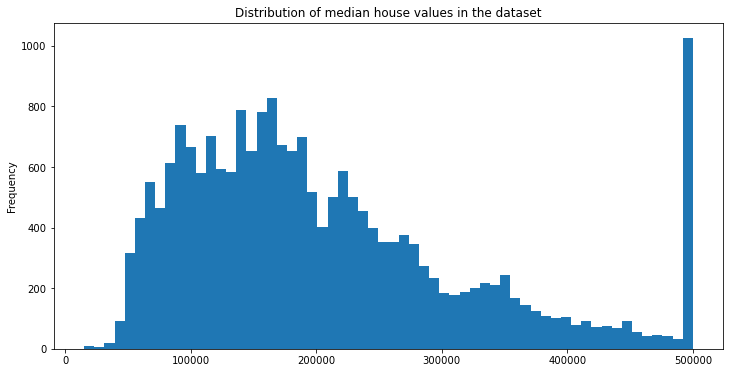

In [58]:
# Plot the distribution of median house values column in the dataset
housing_df.median_house_value.plot(kind = 'hist', bins = 60, title = 'Distribution of median house values in the dataset', 
                            figsize = (12, 6));

In [59]:
# maximum value in the median house values column
housing_df.median_house_value.max()

500001.0

In [60]:
# Count of median house entry with value equal to 500001.0
(housing_df.median_house_value == 500001.0).sum()

965

- There are **965 entries with median house value = 500001.0**. This can be a typo or outlier in this column.
- This is also the largest value in this column.

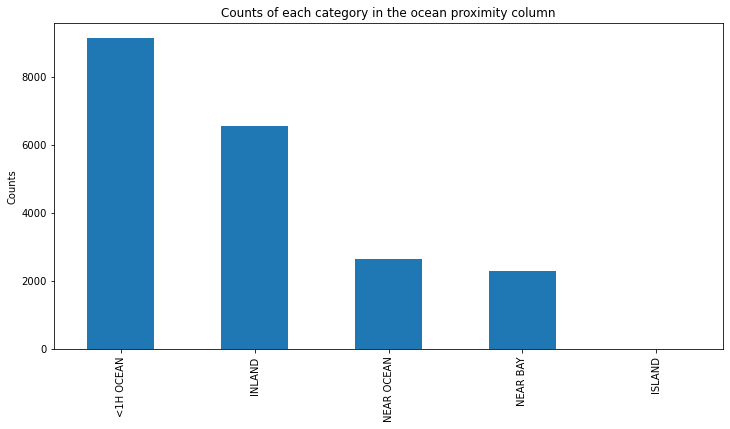

In [61]:
# explore the ocean proximity column
housing_df.ocean_proximity.value_counts().plot(kind = 'bar', title = 'Counts of each category in the ocean proximity column',
                                              ylabel = 'Counts', figsize = (12, 6));

In [62]:
# Counts of each category in the ocean proximity column in the dataset
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- **1H OCEAN** has the largest frequency in this ocean proximity column. 
- **ISLAND** has the lowest frequency.

In [35]:
# Convert the data to suit a binary classification of High Price vs Low Price for the median_house_value column
# Assume that anything >= $200,000 is high price with output value 1 and anything less than that is low price with output value 0.
housing_df['target'] = housing_df.median_house_value.apply(lambda x: 1 if x >= 200000 else 0)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,target
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


### Pipeline

In [36]:
y = housing_df.target
X = housing_df.drop(['median_house_value', 'target'], axis = 1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [37]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print(f"Shape of train_X: {train_X.shape}\nShape of train_y: {train_y.shape}")
print(f"Shape of test_X: {test_X.shape}\nShape of test_y: {test_y.shape}")

Shape of train_X: (16512, 9)
Shape of train_y: (16512,)
Shape of test_X: (4128, 9)
Shape of test_y: (4128,)


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config   
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.utils import estimator_html_repr   
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler

In [39]:
# set up the numeric and categorical transformer
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
                                         ('scaler', 'passthrough')])

categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
                                             ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [40]:
numeric_features = X.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns


data_transformer = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features),
                                                 ('cat', categorical_transformer, categorical_features)])

In [41]:
preprocessor = Pipeline(steps = [('data_transformer', data_transformer),
                                 ('reduce_dim', PCA())])

In [42]:
clf = Pipeline(steps = [('preprocessor', preprocessor), 
                        ('classifier', LogisticRegression(random_state = 0, max_iter = 10000))])

In [45]:
param_grid = {
    'preprocessor__data_transformer__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__data_transformer__cat__imputer__strategy': ['constant','most_frequent'],
    'preprocessor__data_transformer__num__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler()],
    'classifier__C': [0.1, 1.0, 10, 100],
    'preprocessor__reduce_dim__n_components': [2, 5, 7, 9],
    'classifier__solver': ['liblinear','newton-cg', 'lbfgs','sag','saga']}

CV = GridSearchCV(clf, param_grid, n_jobs = 1)                  
CV.fit(train_X, train_y)  

# print(CV.best_params_)    
# print(CV.best_score_)

{'classifier__C': 100, 'classifier__solver': 'lbfgs', 'preprocessor__data_transformer__cat__imputer__strategy': 'constant', 'preprocessor__data_transformer__num__imputer__strategy': 'mean', 'preprocessor__data_transformer__num__scaler': StandardScaler(), 'preprocessor__reduce_dim__n_components': 9}
0.8325456016803182


In [47]:
# set config to diagram for visualizing the pipelines / composite estimators
set_config(display = 'diagram')

# Lets visualize the best estimator from grid search.
CV.best_estimator_

# saving pipeline as html format
# with open('titanic_data_pipeline_estimator.html', 'w') as f:  
#     f.write(estimator_html_repr(grid_search.best_estimator_))


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['ocean_proximity'], dtype='object'))])),
                                 ('reduce_dim', PCA(n_components=9))])),
                ('classifier',
                 LogisticRegression(C=100, max_iter=10000, random_state=0))])

### One hot encode the ocean proximity column

In [64]:
housing_df = pd.get_dummies(housing_df, columns = ['ocean_proximity'])
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0,0,0,1,0


In [65]:
# Rename the columns of the dataframe
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 
           'median_income', 'median_house_value', 'target', '1h_ocean', 'inland', 'island','near_bay', 'near_ocean']

housing_df.columns = columns
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target,1h_ocean,inland,island,near_bay,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0,0,0,1,0


### Fill the missing values in the total_bedrooms column by the mean of the column

In [66]:
housing_df.total_bedrooms.fillna(housing_df.total_bedrooms.mean(), inplace = True)

# check the null values after imputing with mean
housing_df.total_bedrooms.isnull().sum()

0

### Check the correlation in the dataset

In [67]:
housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target,1h_ocean,inland,island,near_bay,near_ocean
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.069255,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.104499,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.078933,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.127469,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.057343,0.018220,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.013484,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.075601,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.537821,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.798184,0.256617,-0.484859,0.023416,0.160284,0.141862
target,-0.069255,-0.104499,0.078933,0.127469,0.057343,-0.013484,0.075601,0.537821,0.798184,1.000000,0.237973,-0.433187,0.018137,0.129736,0.126593


In [68]:
# inputs and outputs for the model
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 
           'median_income', '1h_ocean', 'inland', 'island','near_bay', 'near_ocean']

y = housing_df.target
X = housing_df[columns]

print(f"Shape of inputs: {X.shape}\nShape of outputs: {y.shape}")

Shape of inputs: (20640, 13)
Shape of outputs: (20640,)


In [69]:
# check the distribution of targets
y.value_counts()

0    11885
1     8755
Name: target, dtype: int64

In [70]:
# Use stratified sampling to create an 80-20 train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print(f"Shape of train_X: {train_X.shape}\nShape of train_y: {train_y.shape}")
print(f"Shape of test_X: {test_X.shape}\nShape of test_y: {test_y.shape}")

Shape of train_X: (16512, 13)
Shape of train_y: (16512,)
Shape of test_X: (4128, 13)
Shape of test_y: (4128,)


### Base Line Model

In [71]:
# Define the base line model 
lr_model = LogisticRegression(max_iter = 5000)
score = cross_val_score(lr_model, train_X, train_y, cv = 5, scoring = 'accuracy')
print(f"Mean accuracy with cross validation: {round(score.mean(), 4)}")

Mean accuracy with cross validation: 0.8272


### Separate features into categorical and numeric

In [72]:
# separate numeric features
numeric_features = train_X.iloc[:, :-5]

# separate categorical features
categorical_features = train_X.iloc[:, -5:]

### Scale numeric features for modelling

In [73]:
scalar = StandardScaler()

train_X_scaled = scalar.fit_transform(numeric_features)
test_X_scaled = scalar.transform(test_X.iloc[:, :-5])

In [75]:
# Shape of numeric features
train_X_scaled.shape, test_X_scaled.shape

((16512, 8), (4128, 8))

### Fitting model only on scaled numeric features

In [74]:
# fit the logistic model
lr_model = LogisticRegression(max_iter = 5000)
score = cross_val_score(lr_model, train_X_scaled, train_y, cv = 5, scoring = 'accuracy')
print(f"Mean accuracy with cross validation only using scaled numeric features: {round(score.mean(), 4)}")

Mean accuracy with cross validation only using scaled numeric features: 0.843


### Using both categorical and numerical features to fit model

In [76]:
# concatenate numerical and categorical features 
train_data = np.concatenate((train_X_scaled, categorical_features), 1)
test_data = np.concatenate((test_X_scaled, test_X.iloc[:, -5:]), 1)

train_data.shape, test_data.shape

((16512, 13), (4128, 13))

In [77]:
lr_model = LogisticRegression(max_iter = 5000)
score = cross_val_score(lr_model, train_data, train_y, cv = 5, scoring = 'accuracy')
print(f"Mean accuracy with cross validation using all features: {round(score.mean(), 4)}")

Mean accuracy with cross validation using all features: 0.8431


### Find the best solver for the model

In [79]:
for solver in solvers:
    LR = LogisticRegression(penalty = 'none', solver = solver, max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, train_data, train_y, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy: {round(score.mean(), 4)} with {solver} solver")

Mean accuracy: 0.8438 with sag solver
Mean accuracy: 0.8438 with saga solver
Mean accuracy: 0.8438 with lbfgs solver
Mean accuracy: 0.8438 with newton-cg solver


In [84]:
# performance of model using saga solver and l2 regularization 
for C in lambda_param:
    LR = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, train_data, train_y, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with saga solver: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with saga solver: 0.8431 when C = 0.001
Mean accuracy using cross validation with saga solver: 0.8431 when C = 0.003
Mean accuracy using cross validation with saga solver: 0.8431 when C = 0.01
Mean accuracy using cross validation with saga solver: 0.8431 when C = 0.03
Mean accuracy using cross validation with saga solver: 0.8431 when C = 0.1
Mean accuracy using cross validation with saga solver: 0.8431 when C = 0.3
Mean accuracy using cross validation with saga solver: 0.8431 when C = 1
Mean accuracy using cross validation with saga solver: 0.8431 when C = 3
Mean accuracy using cross validation with saga solver: 0.8431 when C = 10
Mean accuracy using cross validation with saga solver: 0.8431 when C = 30
Mean accuracy using cross validation with saga solver: 0.8431 when C = 100
Mean accuracy using cross validation with saga solver: 0.8431 when C = 300


In [83]:
# performance of model using saga solver and l1 regularization
for C in lambda_param:
    LR = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 0)
    score = cross_val_score(LR, train_data, train_y, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with saga solver: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with saga solver: 0.8435 when C = 0.001
Mean accuracy using cross validation with saga solver: 0.8435 when C = 0.003
Mean accuracy using cross validation with saga solver: 0.8435 when C = 0.01
Mean accuracy using cross validation with saga solver: 0.8435 when C = 0.03
Mean accuracy using cross validation with saga solver: 0.8435 when C = 0.1
Mean accuracy using cross validation with saga solver: 0.8435 when C = 0.3
Mean accuracy using cross validation with saga solver: 0.8435 when C = 1
Mean accuracy using cross validation with saga solver: 0.8435 when C = 3
Mean accuracy using cross validation with saga solver: 0.8435 when C = 10
Mean accuracy using cross validation with saga solver: 0.8435 when C = 30
Mean accuracy using cross validation with saga solver: 0.8435 when C = 100
Mean accuracy using cross validation with saga solver: 0.8435 when C = 300


In [85]:
# performance of model using saga solver and elasticnet regularization
for C in lambda_param:
    LR = LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 10000, random_state = 0, l1_ratio = 0.5)
    score = cross_val_score(LR, train_data, train_y, cv = 5, scoring = 'accuracy')
    print(f"Mean accuracy using cross validation with saga solver: {round(score.mean(), 4)} when C = {C}")

Mean accuracy using cross validation with saga solver: 0.8434 when C = 0.001
Mean accuracy using cross validation with saga solver: 0.8434 when C = 0.003
Mean accuracy using cross validation with saga solver: 0.8434 when C = 0.01
Mean accuracy using cross validation with saga solver: 0.8434 when C = 0.03
Mean accuracy using cross validation with saga solver: 0.8434 when C = 0.1
Mean accuracy using cross validation with saga solver: 0.8434 when C = 0.3
Mean accuracy using cross validation with saga solver: 0.8434 when C = 1
Mean accuracy using cross validation with saga solver: 0.8434 when C = 3
Mean accuracy using cross validation with saga solver: 0.8434 when C = 10
Mean accuracy using cross validation with saga solver: 0.8434 when C = 30
Mean accuracy using cross validation with saga solver: 0.8434 when C = 100
Mean accuracy using cross validation with saga solver: 0.8434 when C = 300


### Best model parameters
- Solver: LBFGS
- penalty: None

In [86]:
# Find the best Logistic Regression model that can solve this problem
lr_model = LogisticRegression(penalty = 'none', max_iter = 10000, solver = 'lbfgs')
lr_model.fit(train_data, train_y)
pred_y = lr_model.predict(test_data)

In [87]:
# confusion matrix
confusion_matrix(test_y, pred_y)

array([[2093,  284],
       [ 369, 1382]], dtype=int64)

In [88]:
# Accuracy
accuracy_score(test_y, pred_y)

0.841812015503876